## Datan analysointi K2020_2 - Tehtävät kerta 5

Palauta Optiman palautuslaatikkoon viimeistään su 15.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

**Opiskelijan nimi:**

## 1. Autoja

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip on tietoja Trafin tiedoissa olevista VW Golf  -autoista.

Lue tiedot DataFrameen ja erota kayttoonottopvm-kentästä käyttöönottovuosi.

Tee sitten
* histogrammi käyttöönottovuodesta
* histogrammi matkamittarin lukemasta, rajaa pois yli 500 000 kilometrin lukemat
* jointplot käyttöönottovuosi<->CO2-päästöt 
* jointplot omamassa<->suurinNettoteho (rajaa selvästi muista poikkeavat omamassa-arvot pois)
* violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel

histogrammi käyttöönottovuodesta


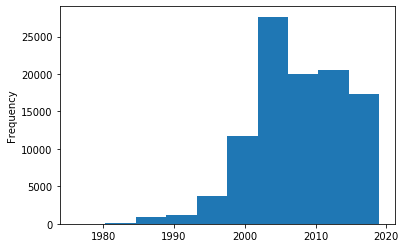

histogrammi matkamittarin lukemasta, rajaa pois yli 500 000 kilometrin lukemat


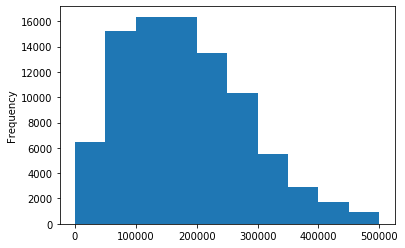

jointplot käyttöönottovuosi<->CO2-päästöt


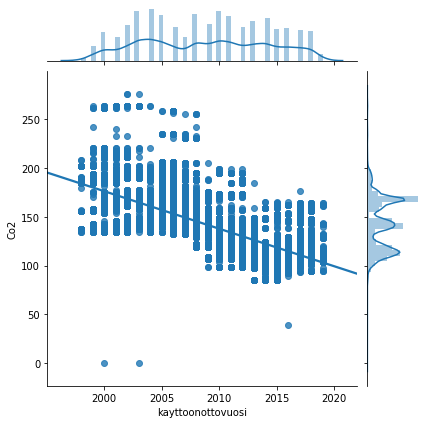

jointplot omamassa<->suurinNettoteho (rajaa selvästi muista poikkeavat omamassa-arvot pois)


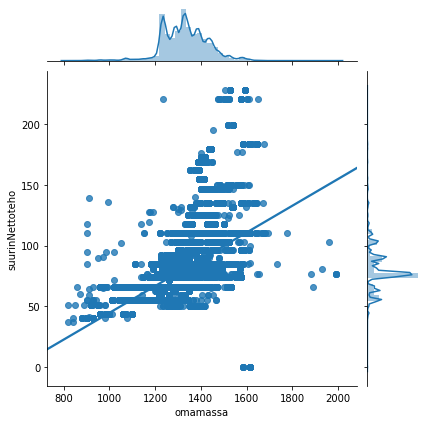

violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel


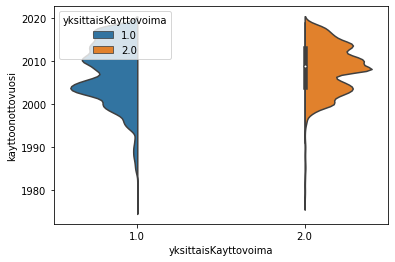

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip', sep = ',', decimal='.')
df['kayttoonottovuosi'] = df['kayttoonottopvm'].astype(str).str[0:4].astype(int)

print('histogrammi käyttöönottovuodesta')
df['kayttoonottovuosi'].plot.hist()
plt.show()

print('histogrammi matkamittarin lukemasta, rajaa pois yli 500 000 kilometrin lukemat')
df2 = df[df['matkamittarilukema'] <= 500000]
df2['matkamittarilukema'].plot.hist()
plt.show()

print('jointplot käyttöönottovuosi<->CO2-päästöt')
#sns.regplot('kayttoonottovuosi', 'Co2', data=df)
#plt.show()
sns.jointplot('kayttoonottovuosi', 'Co2', data=df, kind='reg')
plt.show()

print('jointplot omamassa<->suurinNettoteho (rajaa selvästi muista poikkeavat omamassa-arvot pois)')
#df4 = df.drop(df[df['omamassa'] < 500].index, inplace=True)
#df.shape
df4 = df[df['omamassa'] > 500]
sns.jointplot('omamassa', 'suurinNettoteho', data=df4, kind='reg')

plt.show()

print('violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel')
df3 = df[df['yksittaisKayttovoima'] <= 2.0]
sns.violinplot(x='yksittaisKayttovoima', y='kayttoonottovuosi', hue='yksittaisKayttovoima', split=True,  data=df3)
plt.show()


## 2. Muotoilut
Alla on annettu kaavion luontikoodi (käyttäen np-taulukoita). Tee kaaviosta yksityiskohtaisesti alla olevan mallin mukainen. Tutki [matplotlibin speksistä](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), miten kaavion osia muotoillaan.  

![malli](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kaavio2.png)

leikkauspiste -teksti on manuaalisesti asettetu, ei siis tarvitse erikseen laskea leikkauspistettä


P:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


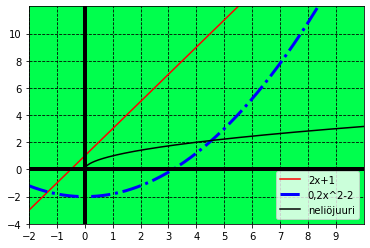

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-2,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-2
y3 = (x)**0.5
fig, ax = plt.subplots()

plt.plot(x, y1, 'r-', label='2x+1')
plt.plot(x, y2, 'b-.', label='0,2x^2-2', linewidth=3.0)
plt.plot(x, y3, 'k-', label='neliöjuuri')
plt.legend(loc='lower right')

ax.set_facecolor((0.0, 1.0, 0.3))

ax.axhline(y=0, color='k', linewidth=4.0)
ax.axvline(x=0, color='k', linewidth=4.0)


plt.xlim(-2, 10)
plt.xticks([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(-4, 12)
plt.yticks([-4, -2, 0, 2, 4, 6, 8, 10])
plt.grid(True, which='both', c='black', linestyle='--')

plt.show()

## 3. Liikennetietoja
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv on yhden päivän tietoja eräältä automaattiselta liikennemittausasemalta ([LAM](https://vayla.fi/avoindata/tietoaineistot/lam-tiedot)). Erotin on puolipiste, mutta datatiedostossa ei ole otsikkoriviä. Kentät ovat järjestyksessä:  

* pistetunnus
* vuosi
* päivän järjestysnumero
* tunti
* minuutti
* sekunti
* sadasosasekunti
* pituus (m)
* kaista
* suunta
* ajoneuvoluokka
* nopeus (km/h)
* faulty (0 = validi havainto, 1=virheellinen havainto)
* kokonaisaika (tekninen)
* aikaväli (tekninen)
* jonoalku (tekninen)


Lue tiedot DataFrameen ja poista virheelliset havainnot.
Tutki sitten sopivien kaavioiden avulla suunnan, ajoneuvoluokan ja kellonajan (esim tunti) vaikutusta nopeusjakaumaan.


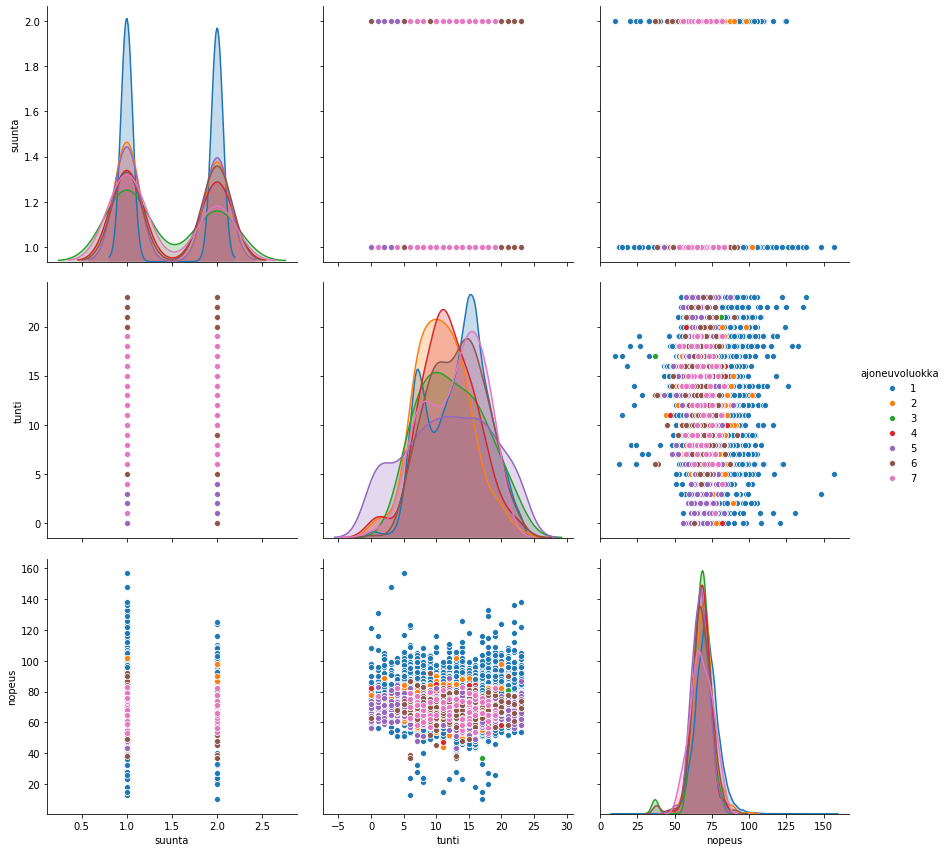

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv', sep = ';', decimal='.')
df.columns= ['pistetunnus', 'vuosi', 'päivännro', 'tunti', 'minuutti', 'sekunti', 'sadasosa', 'pituus', 'kaista', 'suunta', 'ajoneuvoluokka', 'nopeus', 'fault', 'kokonaisaika', 'aikaväli', 'jonoalku']
df.drop(df[df['fault'] > 0].index, inplace=True)

#sns.pairplot(df[['suunta', 'ajoneuvoluokka', 'tunti', 'nopeus']].dropna(), kind='reg')

sns.pairplot(data = df, vars = ['suunta', 'tunti', 'nopeus'], hue = 'ajoneuvoluokka', diag_kind = 'kde', height = 4)

# Create an instance of the PairGrid class.
#grid = sns.PairGrid(data = df, vars = ['suunta', 'ajoneuvoluokka', 'tunti'], height = 4)

# Map a scatter plot to the upper triangle
#grid = grid.map_upper(plt.scatter, color = 'darkred')
# Map a histogram to the diagonal
#grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

plt.show()

## 4. Sää

Lue tiedosto https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv DataFrameen ja tee subplotia käyttäen 4 kaaviota (2 riviä, 2 saraketta) samaan kuvioon (figure):
* lumensyvydet tammi-helmikuun 2018, 2019 ja 2020 päiviltä samaan kaavioon. Korvaa ensin lumensyvyyden arvot -1 nollalla. Laske myös monesko päivä vuodesta on kyseessä ja laita tämä vaaka-akselille.
* laske kuinka monta cm enemmän/vähemmän lumensyvyys on ollut 2020 kuin 2019 tammi-helmikuun aikana, ja tee tästä erosta viivakaavio, vaaka-akselilla päivä
* laske kuinka paljon lumensyvyys on muuttunut edellisen päivän lukemasta ja tee näistä muutoksista histogrammi vuoden 2020 tammi-helmikuun päiviltä
* regplot ilman lämpötilasta ja päivittäisistä lumensyvyyden muutoksista vuoden 2020 tammi-helmikuulta


Laita kuvion kooksi 14 x 14 tuumaa

Malli (ei tarvitse olla täsmälleen samannäköinen):  
![malli4](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lumet2.png)


P:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


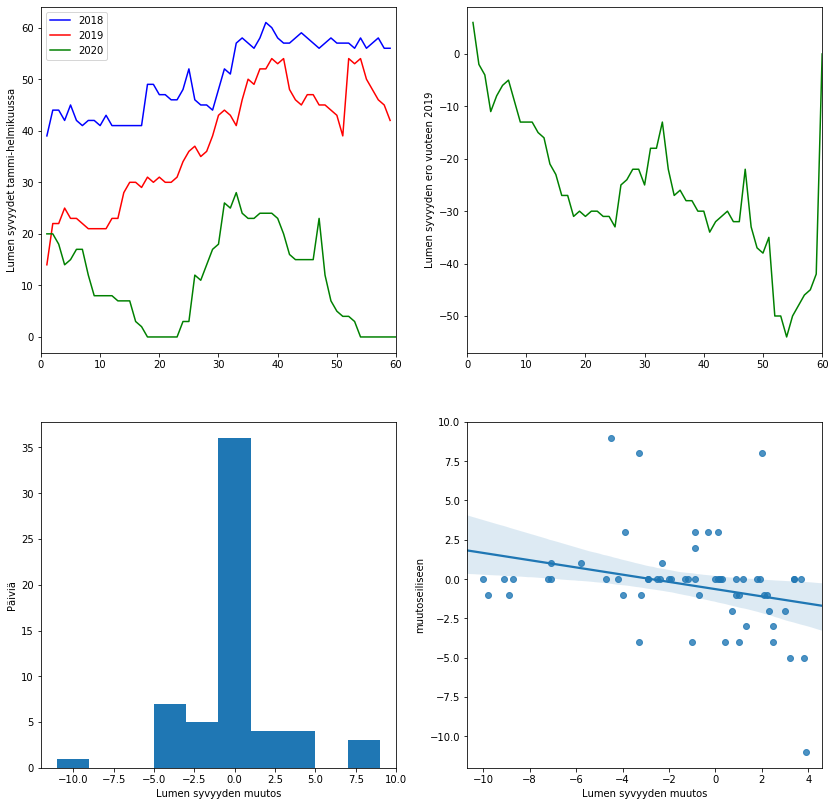

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv', sep = ',', decimal='.')
df['Lumensyvyys (cm)'].replace({-1: 0}, inplace=True)
df = df[(df['Kk'] <= 2) & (df['Vuosi'] >= 2018)]

def laskeMoneskoPv(x):
    pv = 0
    if(x['Kk'] == 2):
        pv += 31    
    return x['Pv'] + pv

df['vuodenpv'] = df.apply(laskeMoneskoPv, axis=1)
#print(df)

df2 = df.groupby(['Vuosi','vuodenpv'])['Lumensyvyys (cm)', 'Ilman lämpötila (degC)'].max()#.unstack()
df2 = df2.reset_index()
#print(df2)

df2018 = df2[df2['Vuosi'] == 2018]
df2019 = df2[df2['Vuosi'] == 2019]
df2020 = df2[df2['Vuosi'] == 2020]
df2020['muutoseiliseen'] = df2020['Lumensyvyys (cm)'] - df2020['Lumensyvyys (cm)'].shift()
df2020.fillna(0, inplace=True)
df2020 = df2020.reset_index()
df2019 = df2019.reset_index()
df2020['erotus2019'] = df2020['Lumensyvyys (cm)'] - df2019['Lumensyvyys (cm)']
df2020.fillna(0, inplace=True)

plt.figure(figsize=(14, 14))  # luodaan uusi kuvio, tämä on "nykyinen kuvio".

plt.subplot(2,2,1)  # tehdään nykyiseen kuvioon 2 riviä, 1 sarake -"ruudukko" ja otetaan 1. paikka "nykyiseksi kaavioksi"
plt.plot(df2018['vuodenpv'], df2018['Lumensyvyys (cm)'], 'b-', label='2018')
plt.plot(df2019['vuodenpv'], df2019['Lumensyvyys (cm)'], 'r-', label='2019')
plt.plot(df2020['vuodenpv'], df2020['Lumensyvyys (cm)'], 'g-', label='2020')
plt.legend(loc='upper left') # lisätään selite "nykyiseen kaavioon"
plt.xlim(0, 60)
plt.ylabel('Lumen syvyydet tammi-helmikuussa')

plt.subplot(2,2,2)
plt.plot(df2020['vuodenpv'], df2020['erotus2019'], 'g-', label='2020')
plt.xlim(0, 60)
plt.ylabel('Lumen syvyyden ero vuoteen 2019')

plt.subplot(2,2,3)
plt.hist(df2020['muutoseiliseen'])
plt.xlabel('Lumen syvyyden muutos')
plt.ylabel('Päiviä')

plt.subplot(2,2,4)
sns.regplot(df2020['Ilman lämpötila (degC)'], df2020['muutoseiliseen'])
plt.xlabel('Lumen syvyyden muutos')

plt.show()

## 5. Variaatiokerroin

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv on erään koneen toiminnasta mittaustulosksia 10 sekunnin välein.

Laske jokaiselle alkavalle tunnille mittaustuloksista `variaatiokerroin` (COV), joka määritellään **keskihajonta/keskiarvo** (siis kyseisen tunnin mittaustulosten keskihajonta ja keskiarvo, pura ensin tuntitieto päivä- ja aikasarakkeesta).

Tee sitten näistä COV-lukemista oheinen "kertymäkaavio", jossa vaaka-akselilla on luvut 0-100 kuvaamassa kuinka monta % COV-arvoista on alle tämän kohdan arvon, ja pystyakselilla COV-arvot.


Rajaa kaavion y-akseli välille 0 ... 0,1


Värjää pienin 30 % vihreällä ja suurin 15 % punaisella.


Malli:  
![malli5](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5.png)

Siis esim. kohdassa 60 kuvaaja on korkeudella n. 0,005 tarkoittaen, että 60 % tunneittaisista COV-arvoista on alle n. 0,005  
![malli5b](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5b.png)
(kaavioon ei näitä 60->0.005 -viivoja tarvitse piirtää)

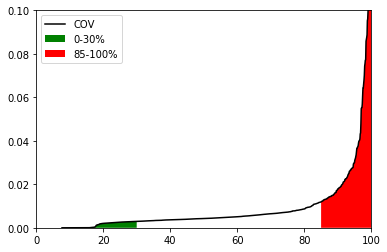

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv', sep = ',', decimal='.')

df['hour'] = df['time'].astype(str).str.split(':').str.get(0)
#print(df)

df2 = df.groupby(['date','hour'])['value'].std() / df.groupby(['date','hour'])['value'].mean()
df2.dropna(inplace=True)
df2 = df2.reset_index()
df2.rename({'value': 'COV'}, axis=1, inplace=True)

df2['rank'] = df2['COV'].rank()
mMax = df2['rank'].max()
mMin = df2['rank'].min()

df2['belowThis'] = ((df2['rank'] / mMax) * 100).round(2)
df3 = df2[['COV', 'belowThis']].sort_values('COV', ascending=True)
#print(df3)

df3g = df3[df3['belowThis'] <= 30]
df3r = df3[df3['belowThis'] >= 85]

fig, ax = plt.subplots()
ax.plot(df3['belowThis'], df3['COV'], 'k-', label='COV')
ax.fill_between(df3g['belowThis'], 0, df3g['COV'], label='0-30%', facecolor='green')
ax.fill_between(df3r['belowThis'], 0, df3r['COV'], label='85-100%', facecolor='red')

plt.ylim(0, 0.1)
plt.xlim(0, 100)
plt.legend(loc='upper left')
plt.show()